In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use(['dark_background'])

import seaborn as sns
sns.set(color_codes=True)

In [2]:
style.use('seaborn-ticks')
sns.set(color_codes=True)

# Tabulation

In [3]:
url = 'https://api.covid19india.org/states_daily.json'

In [4]:
import urllib.request

In [5]:
urllib.request.urlretrieve(url, 'data.json');

In [6]:
covid_data = pd.read_json('data.json')

In [7]:
covid_data

,states_daily
0,"{'an': '0', 'ap': '1', 'ar': '0', 'as': '0', '..."
1,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
2,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
3,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
4,"{'an': '0', 'ap': '0', 'ar': '0', 'as': '0', '..."
...,...
1558,"{'an': '2', 'ap': '1835', 'ar': '255', 'as': '..."
1559,"{'an': '0', 'ap': '16', 'ar': '0', 'as': '10',..."
1560,"{'an': '1', 'ap': '909', 'ar': '165', 'as': '7..."
1561,"{'an': '0', 'ap': '1543', 'ar': '249', 'as': '..."


In [8]:
import json

In [9]:
with open('data.json') as f:
    data = json.load(f)

In [10]:
data = data['states_daily']

In [11]:
covid_data = pd.json_normalize(data)

In [12]:
covid_data

,an,ap,ar,as,br,ch,ct,date,dateymd,dd,...,sk,status,tg,tn,tr,tt,un,up,ut,wb
0,0,1,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Confirmed,1,1,0,81,0,12,0,0
1,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Recovered,0,0,0,9,0,4,0,0
2,0,0,0,0,0,0,0,14-Mar-20,2020-03-14,0,...,0,Deceased,0,0,0,2,0,0,0,0
3,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Confirmed,2,0,0,27,0,1,0,0
4,0,0,0,0,0,0,0,15-Mar-20,2020-03-15,0,...,0,Recovered,1,0,0,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,2,1835,255,857,38,1,114,15-Aug-21,2021-08-15,0,...,213,Recovered,582,1842,253,35936,0,36,31,709
1559,0,16,0,10,0,0,1,15-Aug-21,2021-08-15,0,...,0,Deceased,1,23,4,421,0,1,0,12
1560,1,909,165,758,14,2,68,16-Aug-21,2021-08-16,0,...,20,Confirmed,405,1851,52,24696,0,17,18,502
1561,0,1543,249,1014,42,3,224,16-Aug-21,2021-08-16,0,...,147,Recovered,577,1911,223,36871,0,36,54,691


In [13]:
df = covid_data

In [14]:
df.date = pd.to_datetime(df.date)

In [15]:
df = df[df.status == 'Confirmed']

In [16]:
df.drop('status', axis=1, inplace=True)

C:\Users\nithi\AppData\Local\Temp\ipykernel_21808\2303168678.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('status', axis=1, inplace=True)


In [17]:
df.set_index('date', inplace=True)

In [18]:
df

,an,ap,ar,as,br,ch,ct,dateymd,dd,dl,...,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,
2020-03-14,0,1,0,0,0,0,0,2020-03-14,0,7,...,3,0,1,1,0,81,0,12,0,0
2020-03-15,0,0,0,0,0,0,0,2020-03-15,0,0,...,1,0,2,0,0,27,0,1,0,0
2020-03-16,0,0,0,0,0,0,0,2020-03-16,0,0,...,0,0,1,0,0,15,0,0,1,0
2020-03-17,0,0,0,0,0,0,0,2020-03-17,0,1,...,0,0,1,0,0,11,0,2,0,1
2020-03-18,0,0,0,0,0,0,0,2020-03-18,0,2,...,3,0,8,1,0,37,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-12,0,1859,180,935,43,12,98,2021-08-12,0,49,...,17,100,453,1942,140,40081,0,15,24,747
2021-08-13,0,1746,166,763,47,15,77,2021-08-13,0,50,...,24,150,427,1933,180,38761,0,25,27,739
2021-08-14,0,1535,161,755,39,4,83,2021-08-14,0,50,...,14,129,420,1916,137,36135,0,42,19,705


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 521 entries, 2020-03-14 to 2021-08-16
Data columns (total 40 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   an       521 non-null    object
 1   ap       521 non-null    object
 2   ar       521 non-null    object
 3   as       521 non-null    object
 4   br       521 non-null    object
 5   ch       521 non-null    object
 6   ct       521 non-null    object
 7   dateymd  521 non-null    object
 8   dd       521 non-null    object
 9   dl       521 non-null    object
 10  dn       521 non-null    object
 11  ga       521 non-null    object
 12  gj       521 non-null    object
 13  hp       521 non-null    object
 14  hr       521 non-null    object
 15  jh       521 non-null    object
 16  jk       521 non-null    object
 17  ka       521 non-null    object
 18  kl       521 non-null    object
 19  la       521 non-null    object
 20  ld       521 non-null    object
 21  mh       521 non-nul

In [20]:
df.tn

date
2020-03-14       1
2020-03-15       0
2020-03-16       0
2020-03-17       0
2020-03-18       1
              ... 
2021-08-12    1942
2021-08-13    1933
2021-08-14    1916
2021-08-15    1896
2021-08-16    1851
Name: tn, Length: 521, dtype: object

In [21]:
pd.to_numeric(df.tn)

date
2020-03-14       1
2020-03-15       0
2020-03-16       0
2020-03-17       0
2020-03-18       1
              ... 
2021-08-12    1942
2021-08-13    1933
2021-08-14    1916
2021-08-15    1896
2021-08-16    1851
Name: tn, Length: 521, dtype: int64

In [22]:
df = df.apply(pd.to_numeric)

ValueError: Unable to parse string "2020-03-14" at position 0

In [ ]:
df.info()

In [ ]:
df.tail(7)

## Styling tabulation

In [23]:
df = df.tail(7)

In [24]:
df.style

,an,ap,ar,as,br,ch,ct,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,un,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-10 00:00:00,2,1461,233,929,44,8,112,2021-08-10,0,52,1,141,21,419,23,34,113,1338,21119,7,6,5609,411,633,10,937,102,1041,59,101,11,110,494,1893,205,38376,0,19,39,639
2021-08-11 00:00:00,0,1869,188,886,47,5,83,2021-08-11,0,37,0,103,16,374,16,14,114,1826,23500,10,5,5560,463,606,10,863,64,1078,105,114,19,157,482,1964,244,41586,0,24,40,700
2021-08-12 00:00:00,0,1859,180,935,43,12,98,2021-08-12,0,49,1,88,17,354,16,44,176,1857,21445,9,6,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,40081,0,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,2021-08-13,0,50,0,67,23,333,26,32,129,1669,20452,6,4,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,38761,0,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,2021-08-14,0,50,0,88,25,284,14,28,135,1632,19451,9,7,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,36135,0,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,2021-08-15,0,53,0,75,16,182,22,27,97,1431,18582,6,3,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,33245,0,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,2021-08-16,0,27,2,62,14,276,22,35,77,1065,12294,4,6,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,24696,0,17,18,502


In [25]:
def colour_red_negative(x):
    color = 'red' if x < 0 else 'white'
    return 'color: ' + color

In [26]:
df.style.applymap(colour_red_negative)

TypeError: '<' not supported between instances of 'str' and 'int'

In [27]:
df.drop('un', axis=1, inplace=True)

C:\Users\nithi\AppData\Local\Temp\ipykernel_21808\4034894796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('un', axis=1, inplace=True)


In [28]:
df.style.applymap(colour_red_negative)

TypeError: '<' not supported between instances of 'str' and 'int'

In [29]:
df.style.highlight_max(color='red')

,an,ap,ar,as,br,ch,ct,dateymd,dd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,ld,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-10 00:00:00,2,1461,233,929,44,8,112,2021-08-10,0,52,1,141,21,419,23,34,113,1338,21119,7,6,5609,411,633,10,937,102,1041,59,101,11,110,494,1893,205,38376,19,39,639
2021-08-11 00:00:00,0,1869,188,886,47,5,83,2021-08-11,0,37,0,103,16,374,16,14,114,1826,23500,10,5,5560,463,606,10,863,64,1078,105,114,19,157,482,1964,244,41586,24,40,700
2021-08-12 00:00:00,0,1859,180,935,43,12,98,2021-08-12,0,49,1,88,17,354,16,44,176,1857,21445,9,6,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,40081,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,2021-08-13,0,50,0,67,23,333,26,32,129,1669,20452,6,4,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,38761,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,2021-08-14,0,50,0,88,25,284,14,28,135,1632,19451,9,7,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,36135,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,2021-08-15,0,53,0,75,16,182,22,27,97,1431,18582,6,3,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,33245,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,2021-08-16,0,27,2,62,14,276,22,35,77,1065,12294,4,6,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,24696,17,18,502


In [30]:
df.drop(['dd', 'ld'], axis=1,inplace=True)

C:\Users\nithi\AppData\Local\Temp\ipykernel_21808\1383338611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['dd', 'ld'], axis=1,inplace=True)


In [31]:
df.style.highlight_max(color='red').highlight_min(color='green')

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,tt,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-10 00:00:00,2,1461,233,929,44,8,112,2021-08-10,52,1,141,21,419,23,34,113,1338,21119,7,5609,411,633,10,937,102,1041,59,101,11,110,494,1893,205,38376,19,39,639
2021-08-11 00:00:00,0,1869,188,886,47,5,83,2021-08-11,37,0,103,16,374,16,14,114,1826,23500,10,5560,463,606,10,863,64,1078,105,114,19,157,482,1964,244,41586,24,40,700
2021-08-12 00:00:00,0,1859,180,935,43,12,98,2021-08-12,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,40081,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,2021-08-13,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,38761,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,2021-08-14,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,36135,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,2021-08-15,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,33245,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,2021-08-16,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,24696,17,18,502


In [32]:
df.drop('tt', axis=1, inplace=True)

C:\Users\nithi\AppData\Local\Temp\ipykernel_21808\3986390098.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('tt', axis=1, inplace=True)


In [33]:
def bold_max_value(x):
    is_max = (x == x.max())
    return ['font-weight: bold' if y else '' for y in is_max]

In [34]:
df.style.apply(bold_max_value)

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-10 00:00:00,2,1461,233,929,44,8,112,2021-08-10,52,1,141,21,419,23,34,113,1338,21119,7,5609,411,633,10,937,102,1041,59,101,11,110,494,1893,205,19,39,639
2021-08-11 00:00:00,0,1869,188,886,47,5,83,2021-08-11,37,0,103,16,374,16,14,114,1826,23500,10,5560,463,606,10,863,64,1078,105,114,19,157,482,1964,244,24,40,700
2021-08-12 00:00:00,0,1859,180,935,43,12,98,2021-08-12,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,2021-08-13,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,2021-08-14,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,2021-08-15,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,2021-08-16,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,17,18,502


In [35]:
df.style.apply(bold_max_value).highlight_min(color='green')

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-10 00:00:00,2,1461,233,929,44,8,112,2021-08-10,52,1,141,21,419,23,34,113,1338,21119,7,5609,411,633,10,937,102,1041,59,101,11,110,494,1893,205,19,39,639
2021-08-11 00:00:00,0,1869,188,886,47,5,83,2021-08-11,37,0,103,16,374,16,14,114,1826,23500,10,5560,463,606,10,863,64,1078,105,114,19,157,482,1964,244,24,40,700
2021-08-12 00:00:00,0,1859,180,935,43,12,98,2021-08-12,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,2021-08-13,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,2021-08-14,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,2021-08-15,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,2021-08-16,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,17,18,502


In [36]:
df.style.apply(bold_max_value).highlight_min(color='green', axis=1)

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-10 00:00:00,2,1461,233,929,44,8,112,2021-08-10,52,1,141,21,419,23,34,113,1338,21119,7,5609,411,633,10,937,102,1041,59,101,11,110,494,1893,205,19,39,639
2021-08-11 00:00:00,0,1869,188,886,47,5,83,2021-08-11,37,0,103,16,374,16,14,114,1826,23500,10,5560,463,606,10,863,64,1078,105,114,19,157,482,1964,244,24,40,700
2021-08-12 00:00:00,0,1859,180,935,43,12,98,2021-08-12,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,2021-08-13,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,2021-08-14,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,2021-08-15,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,2021-08-16,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,17,18,502


In [37]:
df.style.apply(bold_max_value).highlight_max(color='red', axis=1)

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-10 00:00:00,2,1461,233,929,44,8,112,2021-08-10,52,1,141,21,419,23,34,113,1338,21119,7,5609,411,633,10,937,102,1041,59,101,11,110,494,1893,205,19,39,639
2021-08-11 00:00:00,0,1869,188,886,47,5,83,2021-08-11,37,0,103,16,374,16,14,114,1826,23500,10,5560,463,606,10,863,64,1078,105,114,19,157,482,1964,244,24,40,700
2021-08-12 00:00:00,0,1859,180,935,43,12,98,2021-08-12,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,2021-08-13,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,2021-08-14,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,2021-08-15,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,2021-08-16,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,17,18,502


In [38]:
df.style.background_gradient(cmap='Reds')

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-10 00:00:00,2,1461,233,929,44,8,112,2021-08-10,52,1,141,21,419,23,34,113,1338,21119,7,5609,411,633,10,937,102,1041,59,101,11,110,494,1893,205,19,39,639
2021-08-11 00:00:00,0,1869,188,886,47,5,83,2021-08-11,37,0,103,16,374,16,14,114,1826,23500,10,5560,463,606,10,863,64,1078,105,114,19,157,482,1964,244,24,40,700
2021-08-12 00:00:00,0,1859,180,935,43,12,98,2021-08-12,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,2021-08-13,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,2021-08-14,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,2021-08-15,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,2021-08-16,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,17,18,502


In [39]:
df.style.background_gradient(cmap='Reds', axis=1)

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-10 00:00:00,2,1461,233,929,44,8,112,2021-08-10,52,1,141,21,419,23,34,113,1338,21119,7,5609,411,633,10,937,102,1041,59,101,11,110,494,1893,205,19,39,639
2021-08-11 00:00:00,0,1869,188,886,47,5,83,2021-08-11,37,0,103,16,374,16,14,114,1826,23500,10,5560,463,606,10,863,64,1078,105,114,19,157,482,1964,244,24,40,700
2021-08-12 00:00:00,0,1859,180,935,43,12,98,2021-08-12,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,2021-08-13,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,2021-08-14,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,2021-08-15,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,2021-08-16,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,17,18,502


In [40]:
df.style.background_gradient(cmap='Reds', subset=['mh', 'tn', 'dl'])

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-10 00:00:00,2,1461,233,929,44,8,112,2021-08-10,52,1,141,21,419,23,34,113,1338,21119,7,5609,411,633,10,937,102,1041,59,101,11,110,494,1893,205,19,39,639
2021-08-11 00:00:00,0,1869,188,886,47,5,83,2021-08-11,37,0,103,16,374,16,14,114,1826,23500,10,5560,463,606,10,863,64,1078,105,114,19,157,482,1964,244,24,40,700
2021-08-12 00:00:00,0,1859,180,935,43,12,98,2021-08-12,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,2021-08-13,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,2021-08-14,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,2021-08-15,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,2021-08-16,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,17,18,502


In [41]:
df.style.bar()

,an,ap,ar,as,br,ch,ct,dateymd,dl,dn,ga,gj,hp,hr,jh,jk,ka,kl,la,mh,ml,mn,mp,mz,nl,or,pb,py,rj,sk,tg,tn,tr,up,ut,wb
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-08-10 00:00:00,2,1461,233,929,44,8,112,2021-08-10,52,1,141,21,419,23,34,113,1338,21119,7,5609,411,633,10,937,102,1041,59,101,11,110,494,1893,205,19,39,639
2021-08-11 00:00:00,0,1869,188,886,47,5,83,2021-08-11,37,0,103,16,374,16,14,114,1826,23500,10,5560,463,606,10,863,64,1078,105,114,19,157,482,1964,244,24,40,700
2021-08-12 00:00:00,0,1859,180,935,43,12,98,2021-08-12,49,1,88,17,354,16,44,176,1857,21445,9,6388,429,677,8,576,80,1107,80,109,17,100,453,1942,140,15,24,747
2021-08-13 00:00:00,0,1746,166,763,47,15,77,2021-08-13,50,0,67,23,333,26,32,129,1669,20452,6,6686,384,522,9,575,81,1193,88,113,24,150,427,1933,180,25,27,739
2021-08-14 00:00:00,0,1535,161,755,39,4,83,2021-08-14,50,0,88,25,284,14,28,135,1632,19451,9,5787,343,439,16,524,61,1132,50,101,14,129,420,1916,137,42,19,705
2021-08-15 00:00:00,0,1506,48,411,28,1,49,2021-08-15,53,0,75,16,182,22,27,97,1431,18582,6,4797,420,602,13,467,54,1058,46,79,18,152,245,1896,142,30,16,673
2021-08-16 00:00:00,1,909,165,758,14,2,68,2021-08-16,27,2,62,14,276,22,35,77,1065,12294,4,4145,352,275,7,249,44,868,30,49,11,20,405,1851,52,17,18,502


In [42]:
df.style.bar(subset=['mh', 'tn', 'dl'])

TypeError: '>=' not supported between instances of 'str' and 'int'

In [43]:
df[['mh', 'tn', 'dl']].style.bar()

,mh,tn,dl
date,,,
2021-08-10 00:00:00,5609,1893,52
2021-08-11 00:00:00,5560,1964,37
2021-08-12 00:00:00,6388,1942,49
2021-08-13 00:00:00,6686,1933,50
2021-08-14 00:00:00,5787,1916,50
2021-08-15 00:00:00,4797,1896,53
2021-08-16 00:00:00,4145,1851,27


In [44]:
df[['mh', 'tn', 'dl']].style.bar(subset=['mh'], color='red').bar(subset=['tn'], color='orange').bar(subset=['dl'], color='yellow')

TypeError: '>=' not supported between instances of 'str' and 'int'

# Distribution of data

## Distribution of a single continuous variable

### Histogram

In [45]:
x = np.random.normal(size=1000)

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


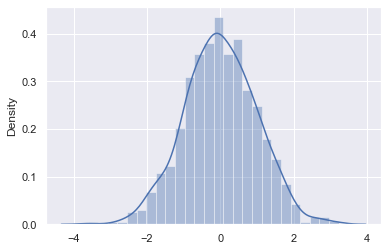

In [46]:
sns.distplot(x);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


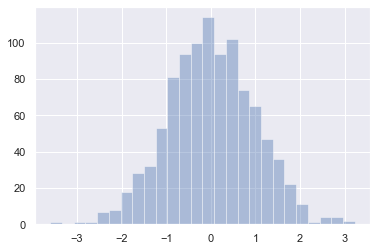

In [47]:
sns.distplot(x, kde=False);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


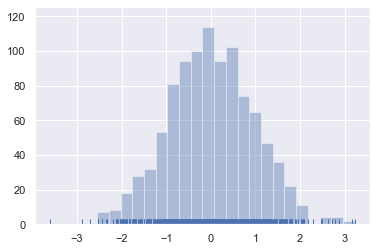

In [48]:
sns.distplot(x, kde=False, rug=True);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


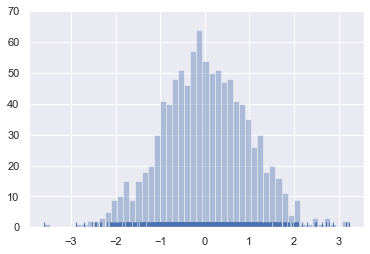

In [49]:
sns.distplot(x, kde=False, rug=True, bins=50);

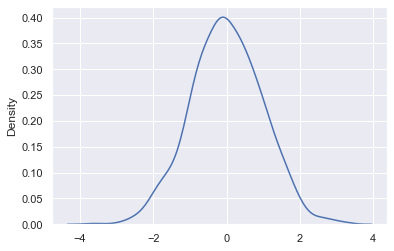

In [50]:
sns.kdeplot(x);

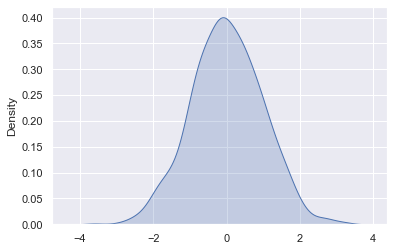

In [51]:
sns.kdeplot(x, shade=True);

In [52]:
y = np.random.uniform(size=1000)

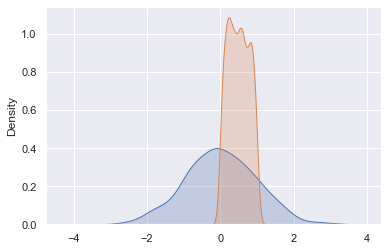

In [53]:
sns.kdeplot(x,shade=True)
sns.kdeplot(y,shade=True);

In [54]:
d = sns.load_dataset('diamonds')

In [55]:
d

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [56]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


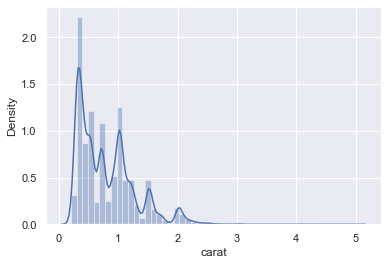

In [57]:
sns.distplot(d.carat);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


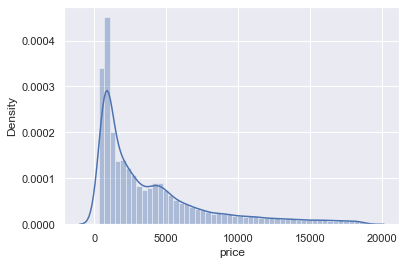

In [58]:
sns.distplot(d.price);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


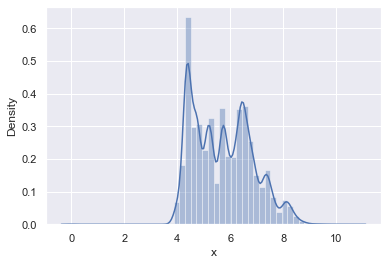

In [59]:
sns.distplot(d.x);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


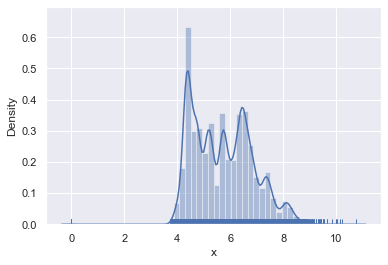

In [60]:
sns.distplot(d.x, rug=True);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


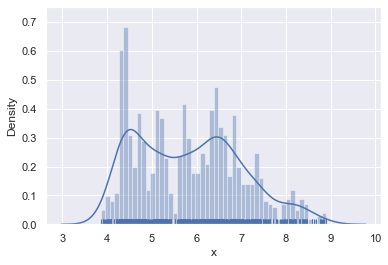

In [61]:
sns.distplot(d.sample(1000).x, rug=True, bins=50);

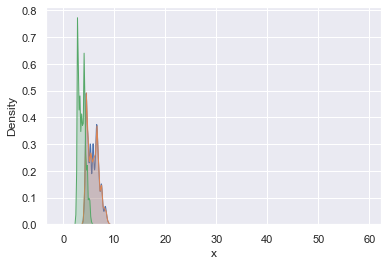

In [62]:
sns.kdeplot(d.x, shade=True)
sns.kdeplot(d.y, shade=True)
sns.kdeplot(d.z, shade=True);

### Box plot

In [63]:
x = np.random.normal(size=1000)

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

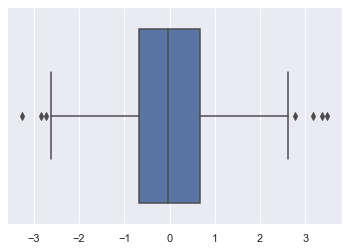

In [64]:
sns.boxplot(x)

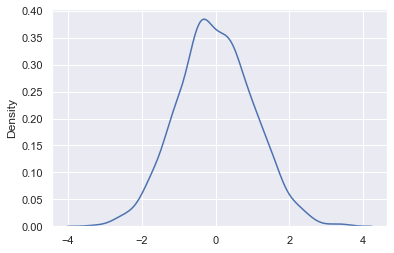

In [65]:
sns.kdeplot(x);

In [66]:
x = np.random.uniform(size=1000)

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


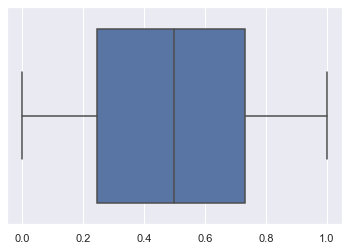

In [67]:
sns.boxplot(x);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

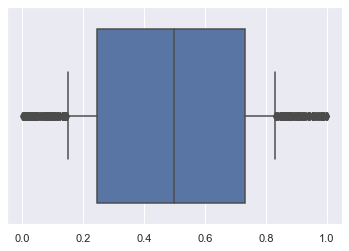

In [68]:
sns.boxplot(x, whis=0.2)

In [69]:
x = np.random.normal(size=1000)

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


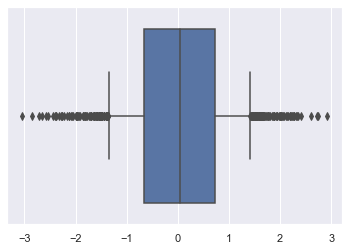

In [70]:
sns.boxplot(x, whis=0.5);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


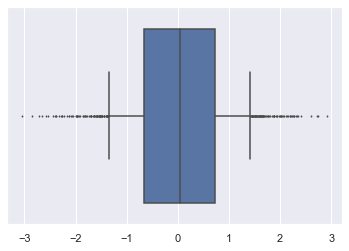

In [71]:
sns.boxplot(x, whis=0.5, fliersize=1);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


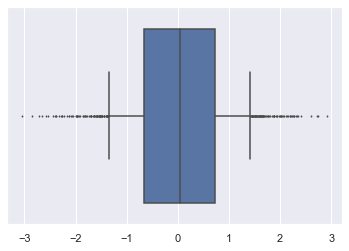

In [72]:
sns.boxplot(x, whis=0.5, fliersize=1, orient='v');

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


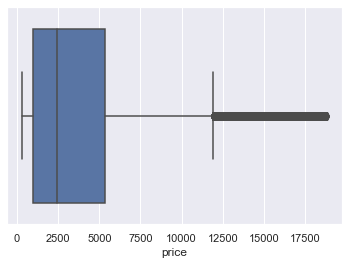

In [73]:
sns.boxplot(d.price);

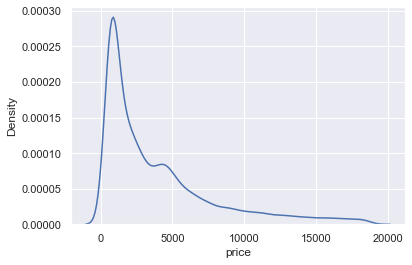

In [74]:
sns.kdeplot(d.price);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


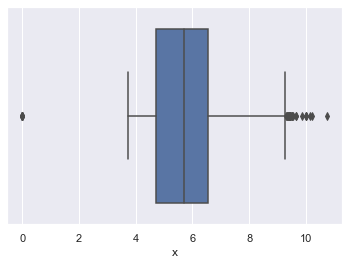

In [75]:
sns.boxplot(d.x);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


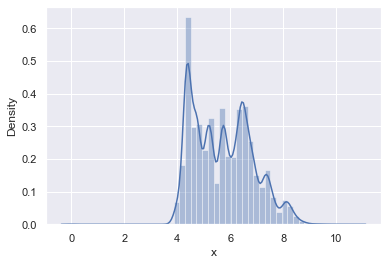

In [76]:
sns.distplot(d.x);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='carat', ylabel='Density'>

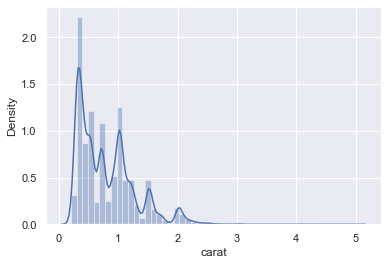

In [77]:
sns.distplot(d.carat)

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat'>

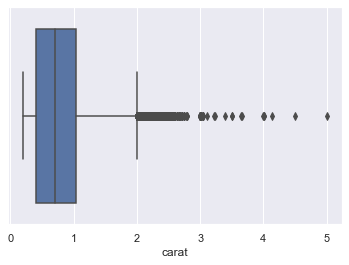

In [78]:
sns.boxplot(d.carat)

### Boxen plots

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


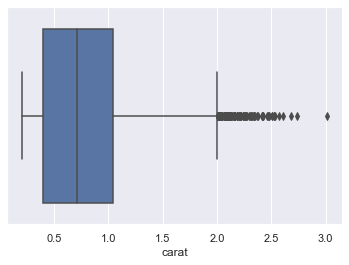

In [79]:
sns.boxplot(d.sample(5000).carat);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


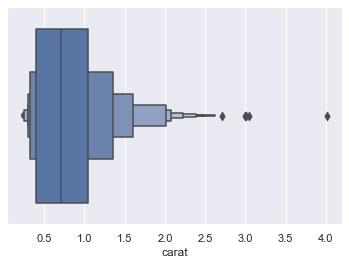

In [80]:
sns.boxenplot(d.sample(5000).carat);

In [81]:
sns.boxenplot(x = 'island', y = 'body_mass_g', data = p);

NameError: name 'p' is not defined

## Distribution of a categorical variable

### Bar plots

In [82]:
c = d.groupby('cut')['cut'].count()

<AxesSubplot:xlabel='cut'>

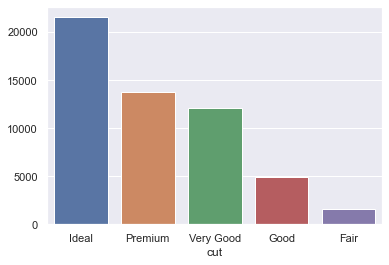

In [83]:
sns.barplot(x=c.index, y=c.values)

In [84]:
c = d.groupby('clarity')['clarity'].count()

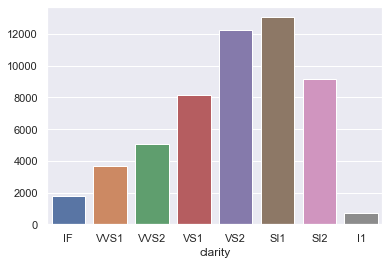

In [85]:
sns.barplot(x=c.index, y=c.values);

In [86]:
c = d.groupby('color')['color'].count()

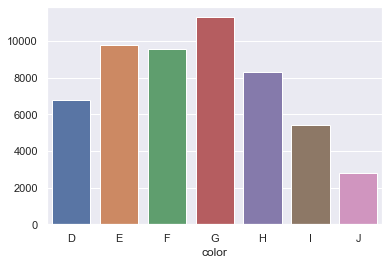

In [87]:
sns.barplot(x=c.index, y=c.values);

## Joint distribution of two variables

### Jointplot

In [88]:
x = np.random.normal(size=1000)
y = np.random.normal(size=1000)

In [89]:
df = pd.DataFrame({'x': x, 'y': y})

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


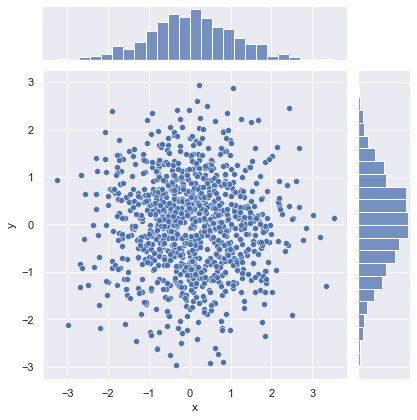

In [90]:
sns.jointplot('x', 'y', data=df);

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


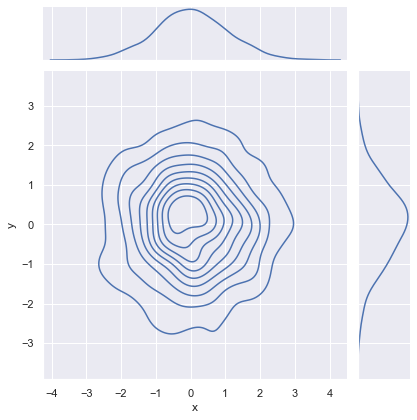

In [91]:
sns.jointplot('x', 'y', data=df, kind='kde');

In [92]:
x = np.random.normal(size=1000)
y = 3 * x + np.random.normal(size=1000)/5

In [93]:
df = pd.DataFrame({'x': x, 'y': y})

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


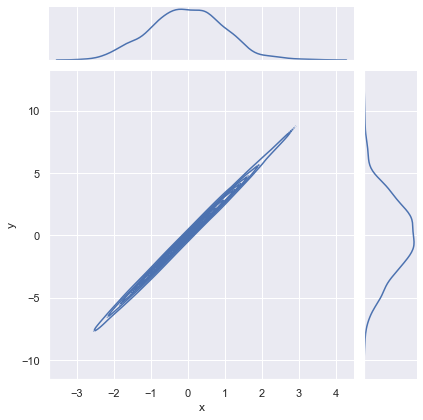

In [94]:
sns.jointplot('x', 'y', data=df, kind='kde');

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


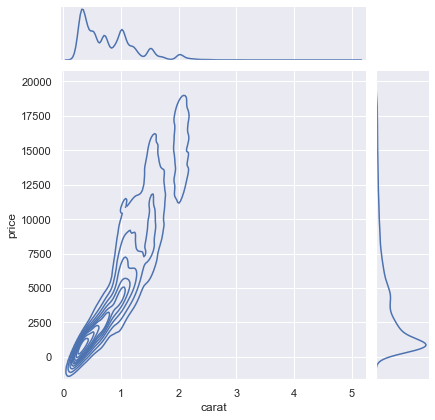

In [95]:
sns.jointplot('carat', 'price', data=d, kind='kde');

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


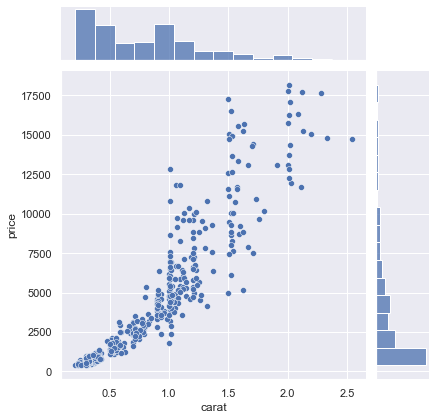

In [96]:
sns.jointplot('carat', 'price', data=d.sample(500));

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


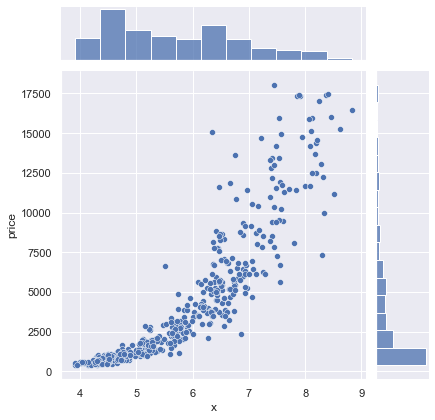

In [97]:
sns.jointplot('x', 'price', data=d.sample(500));

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


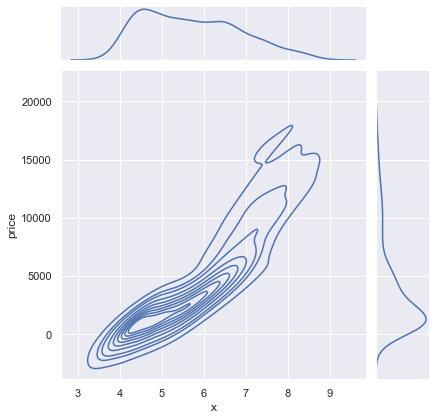

In [98]:
sns.jointplot('x', 'price', data=d.sample(500), kind='kde');

### Swarm plot

C:\Users\nithi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nithi\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


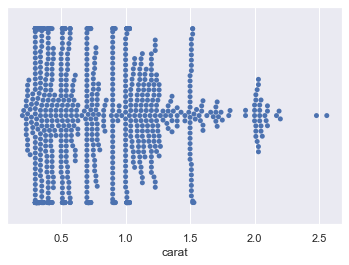

In [99]:
sns.swarmplot(d.sample(1000).carat);

In [ ]:
sns.swarmplot(d.sample(100).price);

In [ ]:
d.info()

In [1]:
sns.swarmplot(x='cut', y='price', data=d.sample(1000));

NameError: name 'sns' is not defined

In [ ]:
sns.swarmplot(x='color', y='price', data=d.sample(1000));

In [ ]:
sns.swarmplot(x='clarity', y='price', data=d.sample(1000));

In [ ]:
sns.swarmplot(x='clarity', y='price', data=d.sample(1000));

In [ ]:
p = sns.load_dataset('penguins')

In [ ]:
p

In [ ]:
sns.swarmplot(x='species', y='body_mass_g', data=p);

In [ ]:
sns.swarmplot(x='island', y='body_mass_g', data=p);

In [ ]:
sns.swarmplot(x='body_mass_g', data=p);

### Violin plot

In [ ]:
sns.violinplot(x='body_mass_g', data=p);

In [ ]:
sns.boxplot(x='body_mass_g', data=p);

In [ ]:
sns.kdeplot(p.body_mass_g, shade=True);

In [ ]:
fig, axs = plt.subplots(nrows=4)
sns.swarmplot(x='body_mass_g', data=p, ax=axs[0]);
sns.violinplot(x='body_mass_g', data=p, ax=axs[1]);
sns.boxplot(x='body_mass_g', data=p, ax=axs[2]);
sns.kdeplot(p.body_mass_g, shade=True, ax=axs[3]);

In [ ]:
fig, axs = plt.subplots(nrows=4)
fig.set_size_inches(5, 10);
sns.swarmplot(x='body_mass_g', data=p, ax=axs[0]);
sns.violinplot(x='body_mass_g', data=p, ax=axs[1]);
sns.boxplot(x='body_mass_g', data=p, ax=axs[2]);
sns.kdeplot(p.body_mass_g, shade=True, ax=axs[3]);

In [ ]:
fig, axs = plt.subplots(nrows=4)
fig.set_size_inches(5, 10);
p1 = sns.swarmplot(x='body_mass_g', data=p, ax=axs[0]);
p1.set(xlim=(2000, 7500));
p2 = sns.violinplot(x='body_mass_g', data=p, ax=axs[1]);
p2.set(xlim=(2000, 7500));
p3 = sns.boxplot(x='body_mass_g', data=p, ax=axs[2]);
p3.set(xlim=(2000, 7500));
p4 = sns.kdeplot(p.body_mass_g, shade=True, ax=axs[3]);
p4.set(xlim=(2000, 7500));

In [ ]:
sns.violinplot(x='body_mass_g', data=p);

In [ ]:
sns.violinplot(x='body_mass_g', data=p, orient='v');

In [ ]:
sns.violinplot(x='species', y='body_mass_g', data=p);

In [ ]:
p.head()

In [ ]:
sns.violinplot(x='species', y='flipper_length_mm', data=p);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', data=p);

In [ ]:
sns.violinplot(x='sex', y='flipper_length_mm', data=p);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', data=p);

In [ ]:
sns.swarmplot(x='island', y='flipper_length_mm', data=p);

In [ ]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='sex', data=p);

In [ ]:
sns.swarmplot(x='island', y='flipper_length_mm', hue='species', data=p);

In [ ]:
sns.swarmplot(x='cut', y='price', data=d.sample(1000));

In [ ]:
sns.swarmplot(x='cut', y='price', hue='color', data=d.sample(1000));

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', data=p[p.sex=='MALE']);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', data=p[p.sex=='FEMALE']);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', hue='sex', split=True, data=p);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='sex', split=True, inner='quartile', data=p);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='species', split=True, inner='quartile', data=p);

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='species', data=p);

In [ ]:
p['binary_species'] = p.species.apply(lambda x: 0 if x == 'Gentoo' else 1)

In [ ]:
p

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='binary_species', split=True, inner='quartile', data=p);

In [ ]:
p['binary_species'] = p.species.apply(lambda x: 'Gentoo' if x == 'Gentoo' else 'Adelie | Chinstrap')

In [ ]:
sns.violinplot(x='island', y='flipper_length_mm', 
               hue='binary_species', split=True, inner='quartile', data=p);

### Faceted plotting

In [ ]:
sns.kdeplot(p.flipper_length_mm, shade=True);

In [ ]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True);

In [ ]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True);

In [ ]:
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True);
plt.legend(title='Species', labels=['Gentoo', 'Adelie', 'Chinstrap']);


In [ ]:
sns.boxplot(p[p.species == 'Gentoo'].flipper_length_mm);
sns.boxplot(p[p.species == 'Adelie'].flipper_length_mm);
sns.boxplot(p[p.species == 'Chinstrap'].flipper_length_mm);
plt.legend(title='Species', labels=['Gentoo', 'Adelie', 'Chinstrap']);


In [ ]:
fig, axs = plt.subplots(nrows=3);
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True, ax=axs[0]);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True, ax=axs[1]);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True, ax=axs[2]);
# plt.legend(title='Species', labels=['Gentoo', 'Adelie', 'Chinstrap']);

In [ ]:
fig, axs = plt.subplots(nrows=3);
sns.kdeplot(p[p.species == 'Gentoo'].flipper_length_mm, shade=True, ax=axs[0]);
sns.kdeplot(p[p.species == 'Adelie'].flipper_length_mm, shade=True, ax=axs[1]);
sns.kdeplot(p[p.species == 'Chinstrap'].flipper_length_mm, shade=True, ax=axs[2]);
plt.tight_layout()
# plt.legend(title='Species', labels=['Gentoo', 'Adelie', 'Chinstrap']);

In [ ]:
column_name = 'species'
nrows = len(p[column_name].unique())
fig, axs = plt.subplots(nrows=nrows);
i = 0
for c_v in p[column_name].unique():
    pl = sns.kdeplot(p[p[column_name] == c_v].flipper_length_mm, 
                shade=True, ax=axs[i]);
    pl.set_title(c_v);
    i += 1
plt.tight_layout()

In [ ]:
g = sns.FacetGrid(p, row='species');
g.map(sns.kdeplot, 'flipper_length_mm', shade=True);

In [ ]:
g = sns.FacetGrid(p, col='species');
g.map(sns.kdeplot, 'flipper_length_mm', shade=True);

In [ ]:
g = sns.FacetGrid(p, col='island');
g.map(sns.kdeplot, 'flipper_length_mm', shade=True);

In [ ]:
g = sns.FacetGrid(p, col='island');
g.map(sns.distplot, 'flipper_length_mm');

In [ ]:
g = sns.FacetGrid(p, col='island', row='sex');
g.map(sns.distplot, 'flipper_length_mm');

In [ ]:
g = sns.FacetGrid(p, col='island', row='sex');
g.map(sns.kdeplot, 'flipper_length_mm');

In [ ]:
g = sns.FacetGrid(p, col='island', row='sex');
g.map(sns.violinplot, 'flipper_length_mm');

### Pair plot

In [ ]:
sns.jointplot(p.body_mass_g, p.flipper_length_mm);

In [ ]:
sns.jointplot(p.body_mass_g, p.culmen_depth_mm);

In [ ]:
sns.pairplot(p);

In [ ]:
sns.pairplot(p, hue='sex');

In [ ]:
sns.pairplot(p, hue='species');

In [ ]:
sns.pairplot(d.sample(1000));

In [ ]:
sns.pairplot(d.sample(1000), hue='cut');

In [ ]:
sns.pairplot(d.sample(1000), hue='cut', corner=True);